In [291]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [292]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cctPq1sYeD6Y6mGg5Lpl-GLDJBwtdihg')

In [293]:
# To display number of NA's in each column
pd.set_option('display.max_rows', None)
df.isna().sum()

Location            0
Burrito             0
Date                0
Neighborhood      329
Address           333
URL               334
Yelp              334
Google            334
Chips             395
Cost                7
Hunger              3
Mass (g)          399
Density (g/mL)    399
Length            138
Circum            140
Volume            140
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
Reviewer            1
Notes             275
Unreliable        388
NonSD             414
Beef              242
Pico              263
Guac              267
Cheese            262
Fries             294
Sour cream        329
Pork              370
Chicken           400
Shrimp            400
Fish              415
Rice              385
Beans             386
Lettuce           410
Tomato            414
Bell peper        414
Carrots           420
Cabbage   

In [294]:
# Dropping columns which have more than 40% rows with NA
burritos = df.loc[:, df.isnull().mean() < .4]
burritos.isna().sum() # To display the number of NAs after the above removal

Location          0
Burrito           0
Date              0
Cost              7
Hunger            3
Length          138
Circum          140
Volume          140
Tortilla          0
Temp             20
Meat             14
Fillings          3
Meat:filling      9
Uniformity        2
Salsa            25
Synergy           2
Wrap              3
Reviewer          1
Great             0
dtype: int64

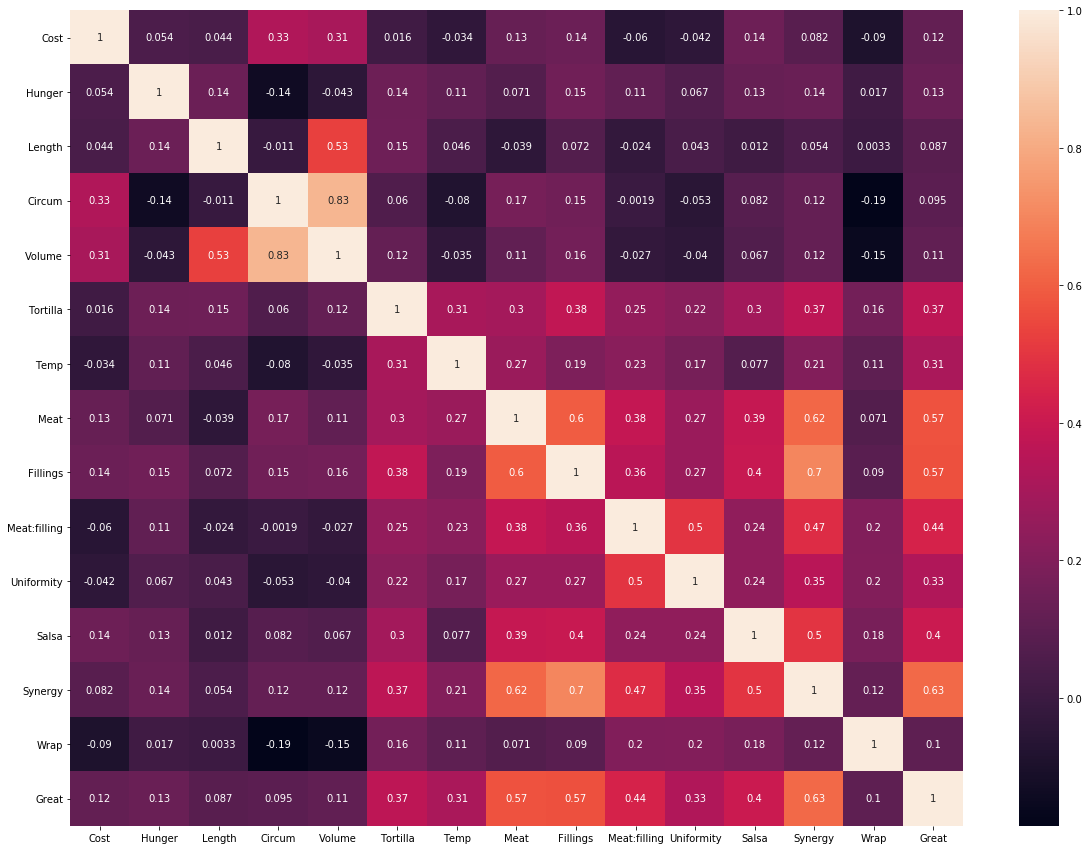

In [295]:
# Correlation plot for the new Dataset
corr = burritos.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(corr,annot=True)

In [296]:
# Replacing NA with mean of the respective columns
burritos = burritos.fillna(burritos.mean())
burritos 

,Location,Burrito,Date,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Reviewer,Great
0,Donato's taco shop,California,1/18/2016,6.490000,3.000000,20.038233,22.135765,0.786477,3.00,5.000000,3.000000,3.500000,4.000000,4.000000,4.00000,4.000000,4.000000,Scott,False
1,Oscar's Mexican food,California,1/24/2016,5.450000,3.500000,20.038233,22.135765,0.786477,2.00,3.500000,2.500000,2.500000,2.000000,4.000000,3.50000,2.500000,5.000000,Scott,False
2,Oscar's Mexican food,Carnitas,1/24/2016,4.850000,1.500000,20.038233,22.135765,0.786477,3.00,2.000000,2.500000,3.000000,4.500000,4.000000,3.00000,3.000000,5.000000,Emily,False
3,Oscar's Mexican food,Carne asada,1/24/2016,5.250000,2.000000,20.038233,22.135765,0.786477,3.00,2.000000,3.500000,3.000000,4.000000,5.000000,4.00000,4.000000,5.000000,Ricardo,False
4,Pollos Maria,California,1/27/2016,6.590000,4.000000,20.038233,22.135765,0.786477,4.00,5.000000,4.000000,3.500000,4.500000,5.000000,2.50000,4.500000,4.000000,Scott,True
5,Pollos Maria,combo chicken,1/28/2016,6.990000,4.000000,20.038233,22.135765,0.786477,3.00,4.000000,5.000000,3.500000,2.500000,2.500000,2.50000,4.000000,1.000000,Emily,False
6,Nico's Taco Shop,California,1/30/2016,7.190000,1.500000,20.038233,22.135765,0.786477,2.00,3.000000,3.000000,2.000000,2.500000,2.500000,3.37197,2.000000,3.000000,Scott,False
7,Nico's Taco Shop,Carnitas,1/30/2016,6.990000,4.000000,20.038233,22.135765,0.786477,2.50,3.000000,3.000000,2.500000,3.000000,3.500000,3.37197,2.500000,3.000000,Emily,False
8,Los Primos Mexican Food,Monster California,2/1/2016,9.250000,3.500000,20.038233,22.135765,0.786477,2.00,4.500000,4.500000,3.500000,1.500000,3.000000,3.50000,4.000000,2.000000,Scott,False
9,JV's Mexican Food,Carne Asada,2/6/2016,6.250000,3.500000,20.038233,22.135765,0.786477,2.50,1.500000,1.500000,3.000000,4.500000,3.000000,1.50000,2.000000,4.500000,Scott,False


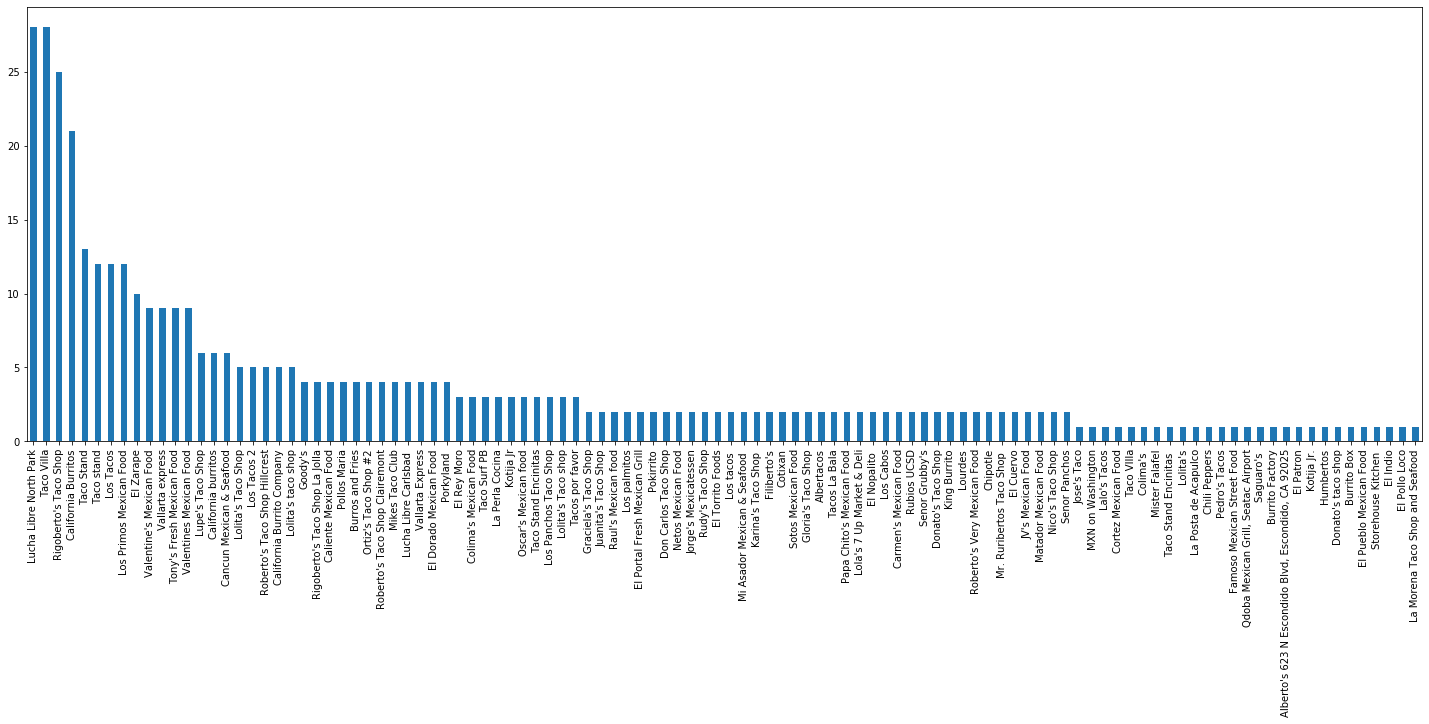

In [297]:
# plotting frequency distribution for column "Location"
plt.subplots(figsize=(25,8))
burritos['Location'].value_counts().plot(kind='bar')

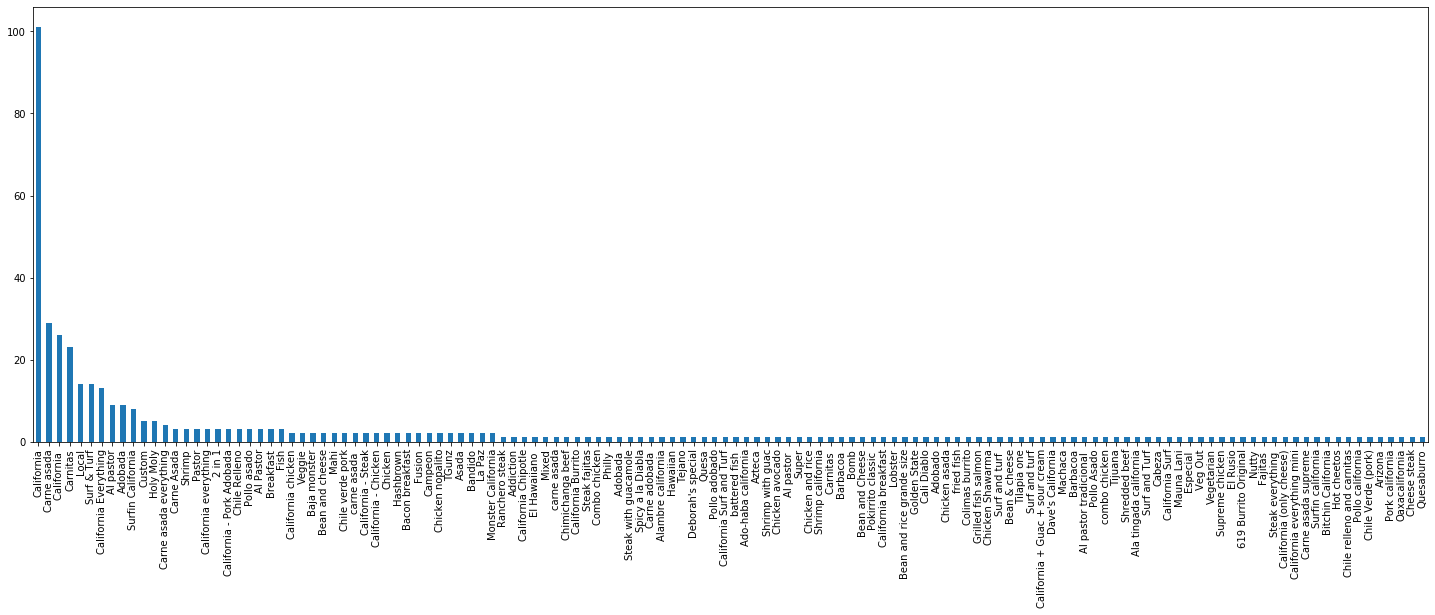

In [298]:
# plotting frequency distribution for column "Burrito"
plt.subplots(figsize=(25,8))
burritos['Burrito'].value_counts().plot(kind='bar')

In [299]:
# Converting column "Date" to Date datatype
burritos['Date'] = pd.to_datetime(burritos['Date'])

In [300]:
# Making "Date" as dataset index. This will be helpful in splitting the dataset into train-validate-test
burritos = burritos.set_index(burritos['Date'])
burritos = burritos.sort_index()
burritos

,Location,Burrito,Date,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Reviewer,Great
Date,,,,,,,,,,,,,,,,,,,
2011-05-16,Goody's,Custom,2011-05-16,8.000000,4.000000,20.038233,22.135765,0.786477,3.00,3.783042,2.000000,3.000000,2.000000,3.000000,2.00000,3.000000,2.000000,Albert N,False
2015-04-20,Rigoberto's Taco Shop,Al pastor,2015-04-20,7.067343,4.000000,20.038233,22.135765,0.786477,5.00,3.783042,5.000000,5.000000,5.000000,4.000000,5.00000,5.000000,5.000000,Erica,True
2016-01-18,Donato's taco shop,California,2016-01-18,6.490000,3.000000,20.038233,22.135765,0.786477,3.00,5.000000,3.000000,3.500000,4.000000,4.000000,4.00000,4.000000,4.000000,Scott,False
2016-01-24,Oscar's Mexican food,Carne asada,2016-01-24,5.250000,2.000000,20.038233,22.135765,0.786477,3.00,2.000000,3.500000,3.000000,4.000000,5.000000,4.00000,4.000000,5.000000,Ricardo,False
2016-01-24,Oscar's Mexican food,California,2016-01-24,5.450000,3.500000,20.038233,22.135765,0.786477,2.00,3.500000,2.500000,2.500000,2.000000,4.000000,3.50000,2.500000,5.000000,Scott,False
2016-01-24,Oscar's Mexican food,Carnitas,2016-01-24,4.850000,1.500000,20.038233,22.135765,0.786477,3.00,2.000000,2.500000,3.000000,4.500000,4.000000,3.00000,3.000000,5.000000,Emily,False
2016-01-27,Pollos Maria,California,2016-01-27,6.590000,4.000000,20.038233,22.135765,0.786477,4.00,5.000000,4.000000,3.500000,4.500000,5.000000,2.50000,4.500000,4.000000,Scott,True
2016-01-28,Pollos Maria,combo chicken,2016-01-28,6.990000,4.000000,20.038233,22.135765,0.786477,3.00,4.000000,5.000000,3.500000,2.500000,2.500000,2.50000,4.000000,1.000000,Emily,False
2016-01-30,Nico's Taco Shop,California,2016-01-30,7.190000,1.500000,20.038233,22.135765,0.786477,2.00,3.000000,3.000000,2.000000,2.500000,2.500000,3.37197,2.000000,3.000000,Scott,False


In [301]:
# Removing colume "Date"
burritos = burritos.drop(columns=['Date'])
burritos

,Location,Burrito,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Reviewer,Great
Date,,,,,,,,,,,,,,,,,,
2011-05-16,Goody's,Custom,8.000000,4.000000,20.038233,22.135765,0.786477,3.00,3.783042,2.000000,3.000000,2.000000,3.000000,2.00000,3.000000,2.000000,Albert N,False
2015-04-20,Rigoberto's Taco Shop,Al pastor,7.067343,4.000000,20.038233,22.135765,0.786477,5.00,3.783042,5.000000,5.000000,5.000000,4.000000,5.00000,5.000000,5.000000,Erica,True
2016-01-18,Donato's taco shop,California,6.490000,3.000000,20.038233,22.135765,0.786477,3.00,5.000000,3.000000,3.500000,4.000000,4.000000,4.00000,4.000000,4.000000,Scott,False
2016-01-24,Oscar's Mexican food,Carne asada,5.250000,2.000000,20.038233,22.135765,0.786477,3.00,2.000000,3.500000,3.000000,4.000000,5.000000,4.00000,4.000000,5.000000,Ricardo,False
2016-01-24,Oscar's Mexican food,California,5.450000,3.500000,20.038233,22.135765,0.786477,2.00,3.500000,2.500000,2.500000,2.000000,4.000000,3.50000,2.500000,5.000000,Scott,False
2016-01-24,Oscar's Mexican food,Carnitas,4.850000,1.500000,20.038233,22.135765,0.786477,3.00,2.000000,2.500000,3.000000,4.500000,4.000000,3.00000,3.000000,5.000000,Emily,False
2016-01-27,Pollos Maria,California,6.590000,4.000000,20.038233,22.135765,0.786477,4.00,5.000000,4.000000,3.500000,4.500000,5.000000,2.50000,4.500000,4.000000,Scott,True
2016-01-28,Pollos Maria,combo chicken,6.990000,4.000000,20.038233,22.135765,0.786477,3.00,4.000000,5.000000,3.500000,2.500000,2.500000,2.50000,4.000000,1.000000,Emily,False
2016-01-30,Nico's Taco Shop,California,7.190000,1.500000,20.038233,22.135765,0.786477,2.00,3.000000,3.000000,2.000000,2.500000,2.500000,3.37197,2.000000,3.000000,Scott,False


In [302]:
# Changing datatype of colume "Reviewer" to string
burritos['Reviewer'] = burritos['Reviewer'].astype(str)

In [303]:
# Using Label-encoder, since we have 4 categorical attributes
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
burritos['Location']= le.fit_transform(burritos['Location']) 
burritos['Burrito']= le.fit_transform(burritos['Burrito']) 
burritos['Reviewer']= le.fit_transform(burritos['Reviewer'])
burritos['Great']= le.fit_transform(burritos['Great']) 

In [304]:
# Spliting dataset into train-validate-test, with respect to the year
train = burritos['2011-05-16':'2016-12-15']  # Train dataset from year 2016 and earlier
validate = burritos['2017-01-04':'2017-12-29']  # Validation dataset from year 2017
test  = burritos['2018-01-02':]  # Test dataset from year 2018 and later

# To check their dimensions
print('Train Dataset:',train.shape)
print('Validation Dataset:',validate.shape)
print('Test Dataset:',test.shape)

Train Dataset: (298, 18)
Validation Dataset: (85, 18)
Test Dataset: (38, 18)


In [305]:
# Splitting as X and Y. X for input variables. Y for the variable to be predicted

X_train = train.iloc[:,0:17]
Y_train = train.iloc[:,17]

X_validate = validate.iloc[:,0:17]
Y_validate = validate.iloc[:,17]

X_test = test.iloc[:,0:17]
Y_test = test.iloc[:,17]

In [306]:
# Performing Logistics Regression

from sklearn.linear_model import LogisticRegression

# logistic model 
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)

# Prediction
y_val_pred = logreg.predict(X_validate)
y_test_pred = logreg.predict(X_test)

C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [307]:
# creating a confusion matrix for the above model
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_validate, y_pred)
cnf_matrix

array([[37, 10],
       [ 5, 33]], dtype=int64)

In [308]:
# Accuracy for Logistic Regression Model
print("Validation Accuracy:",metrics.accuracy_score(Y_validate, y_val_pred)) # For Validation set
print("Test Accuracy:",metrics.accuracy_score(Y_test, y_test_pred)) # For Test set

Validation Accuracy: 0.788235294117647
Test Accuracy: 0.7368421052631579


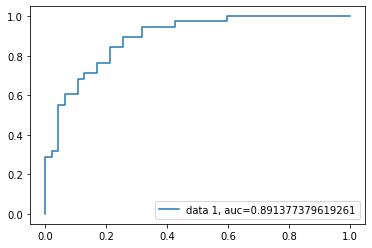

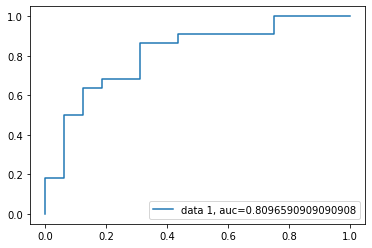

In [309]:
# Contructing ROC Logistic Regression Model – Validation set
y_pred_proba = logreg.predict_proba(X_validate)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_validate,  y_pred_proba)
auc = metrics.roc_auc_score(Y_validate, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Contructing ROC Logistic Regression Model – Test set
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [310]:
# Performing Ada-boosting to increase accuracy

from sklearn.ensemble import AdaBoostClassifier

In [311]:
# AdaBoost Model
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

#Prediction
y_val_pred = model.predict(X_validate)
y_test_pred = model.predict(X_test)


# Accuracy for AdaBoost Model
print("Validation Accuracy:",metrics.accuracy_score(Y_validate, y_val_pred))
print("Test Accuracy:",metrics.accuracy_score(Y_test, y_test_pred))



Validation Accuracy: 0.8235294117647058
Test Accuracy: 0.7631578947368421


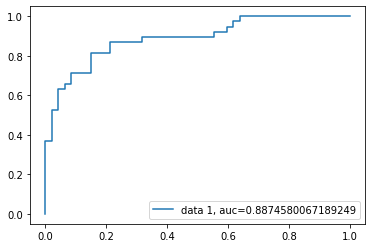

In [312]:
# Contructing ROC for Ada-boosting model
y_pred_proba = model.predict_proba(X_validate)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_validate,  y_pred_proba)
auc = metrics.roc_auc_score(Y_validate, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [313]:
import xgboost as xgb



In [314]:
xg_reg = xgb.XGBRegressor(objective ='binary:hinge', learning_rate = 1, alpha = 10, n_estimators = 10)

In [315]:
xg_reg.fit(X_train,Y_train)

# Prediction
xg_val_preds = xg_reg.predict(X_validate)
xg_test_preds = xg_reg.predict(X_test)

# Accuracy for XBboost Model
print("Validation Accuracy:",metrics.accuracy_score(Y_validate, xg_val_preds))
print("Test Accuracy:",metrics.accuracy_score(Y_test, xg_test_preds))


Validation Accuracy: 0.8117647058823529
Test Accuracy: 0.7105263157894737
